In [1]:
import csv
import pandas as pd
from helper import reload_preprocess
from learning import Learner
from results import accuracy, outcome
from sklearn.feature_extraction.text import TfidfVectorizer

1534


In [2]:
reload_preprocess()

In [3]:
train = pd.read_csv('../data/csv/training.csv').dropna()
tfidf =  TfidfVectorizer(token_pattern=r'[^\s]+', max_features=30000, ngram_range=(1, 2))
X = tfidf.fit_transform(train['text'])
pd.DataFrame(tfidf.idf_, tfidf.get_feature_names_out(), columns=["tfidf_weights"]).sort_values('tfidf_weights').head(20)

,tfidf_weights
voter,2.059481
pas,2.336021
vote,2.420970
ne,2.532515
dimanche,2.691510
tour,3.331547
ça,3.437407
plus,3.544621
france,3.637893
élections,3.646073


## Analyze and test the models on the test dataset

In [4]:
learner_test = Learner('test')

### Naïve Bayes

       text  label  percent
bayes                      
neg      96     96     5.59
neu    1427   1427    83.11
pos     194    194    11.30


Accuracy: 66.511
Macro F1-score: 61.855
Precision: 65.174
Recall: 66.511
              precision    recall  f1-score   support

    Positive       0.72      0.40      0.51       351
     Neutral       0.67      0.91      0.77      1044
    Negative       0.53      0.16      0.24       322

    accuracy                           0.67      1717
   macro avg       0.64      0.49      0.51      1717
weighted avg       0.65      0.67      0.62      1717



True

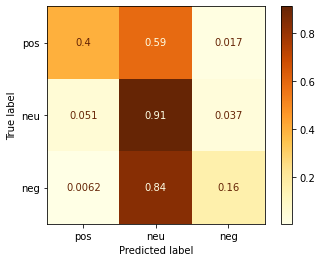

In [5]:
outcome(learner_test.df.drop(columns=['logistic','svm'], axis=1), 'bayes', test=True)
print('\n')
accuracy(learner_test.df['label'], learner_test.df['bayes'])

### Logistic Regression

          text  label  percent
logistic                      
neg        353    353    20.56
neu        997    997    58.07
pos        367    367    21.37


Accuracy: 63.192
Macro F1-score: 63.477
Precision: 63.855
Recall: 63.192
              precision    recall  f1-score   support

    Positive       0.59      0.61      0.60       351
     Neutral       0.72      0.69      0.71      1044
    Negative       0.42      0.47      0.44       322

    accuracy                           0.63      1717
   macro avg       0.58      0.59      0.58      1717
weighted avg       0.64      0.63      0.63      1717



True

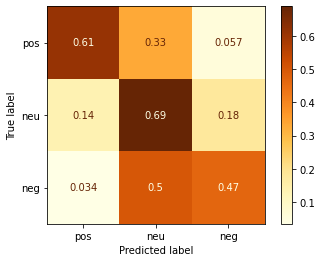

In [6]:
outcome(learner_test.df.drop(columns=['bayes','svm'], axis=1), 'logistic', test=True)
print('\n')
accuracy(learner_test.df['label'], learner_test.df['logistic'])

### Support Vector Machines

     text  label  percent
svm                      
neg   155    155     9.03
neu  1296   1296    75.48
pos   266    266    15.49


Accuracy: 66.919
Macro F1-score: 64.347
Precision: 65.072
Recall: 66.919
              precision    recall  f1-score   support

    Positive       0.66      0.50      0.57       351
     Neutral       0.69      0.86      0.76      1044
    Negative       0.52      0.25      0.34       322

    accuracy                           0.67      1717
   macro avg       0.62      0.53      0.56      1717
weighted avg       0.65      0.67      0.64      1717



True

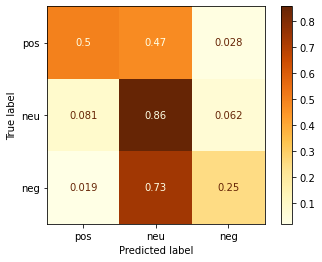

In [7]:
outcome(learner_test.df.drop(columns=['logistic','bayes'], axis=1), 'svm', test=True)
print('\n')
accuracy(learner_test.df['label'], learner_test.df['svm'])

## Predict the winner using the models

In [8]:
learner_prediction_macron = Learner('prediction_macron')
learner_prediction_lepen = Learner('prediction_lepen')

In [9]:
macron_count = len(learner_prediction_macron.df)
lepen_count = len(learner_prediction_lepen.df)

#### Naïve Bayes

In [10]:
outcome(learner_prediction_macron.df.drop(columns=['logistic', 'svm'], axis=1), 'bayes', macron_count, lepen_count)
outcome(learner_prediction_lepen.df.drop(columns=['logistic', 'svm'], axis=1), 'bayes', lepen_count, macron_count)

       text  percent
bayes               
neg     101     6.60
neu    1323    86.47
pos     106     6.93
0.2557878749166064
       text  percent
bayes               
neg      91     5.94
neu    1316    85.84
pos     126     8.22
0.29060693185049447


#### Logistic Regression

In [11]:
outcome(learner_prediction_macron.df.drop(columns=['bayes', 'svm'], axis=1), 'logistic', macron_count, lepen_count)
outcome(learner_prediction_lepen.df.drop(columns=['bayes', 'svm'], axis=1), 'logistic', lepen_count, macron_count)

          text  percent
logistic               
neg        455    29.74
neu        850    55.56
pos        225    14.71
0.16527913809990205
          text  percent
logistic               
neg        360    23.48
neu        922    60.14
pos        251    16.37
0.205602158276841


#### Support Vector Machines

In [12]:
outcome(learner_prediction_macron.df.drop(columns=['bayes', 'logistic'], axis=1), 'svm', macron_count, lepen_count)
outcome(learner_prediction_lepen.df.drop(columns=['bayes', 'logistic'], axis=1), 'svm', lepen_count, macron_count)

     text  percent
svm               
neg   219    14.31
neu  1153    75.36
pos   158    10.33
0.20934383256650133
     text  percent
svm               
neg   175    11.42
neu  1198    78.15
pos   160    10.44
0.23903986434136856
